# FacetGrid

In [1]:
import pyforest

In [2]:
penguins = sns.load_dataset('penguins')

<IPython.core.display.Javascript object>

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Splting the data on 3 different plot - every plot is for every single island from - there's 3 unique islands in pengins data frame:

In [4]:
penguins['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

<IPython.core.display.Javascript object>

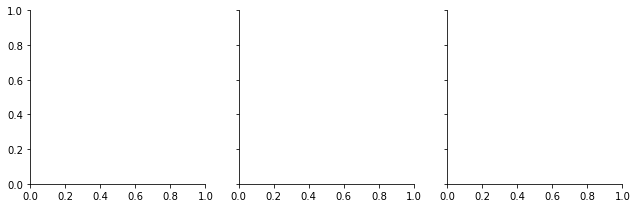

In [5]:
g=sns.FacetGrid(penguins, col='island')

In [6]:
type(g);

## Using map method

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

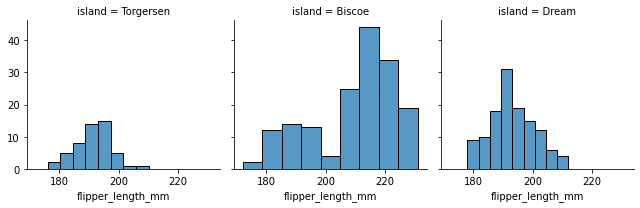

In [7]:
g.map(sns.histplot, 'flipper_length_mm')
plt.show()

seborn grouping data in 3 unique islands and make histplots for each unique island

## Using map_dataframe() method

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

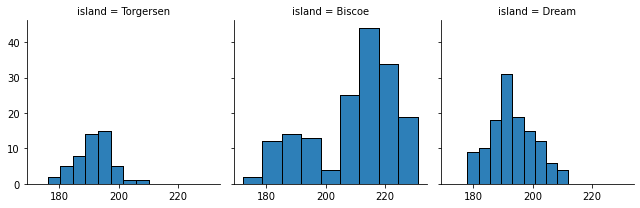

In [8]:
g.map_dataframe(sns.histplot, x='flipper_length_mm')
plt.show()

Difference in this two functions: 
* **map: doesn't need kargs**
* **map_dataframe: using kargs**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

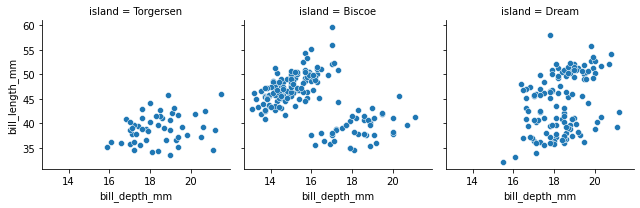

In [9]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, 'bill_depth_mm', 'bill_length_mm')

## Methods and Attributes

In [10]:
type(g)

seaborn.axisgrid.FacetGrid

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

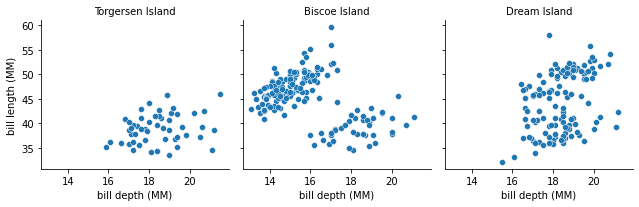

In [11]:
g = sns.FacetGrid(penguins, col='island')
g.map_dataframe(sns.scatterplot, 'bill_depth_mm', 'bill_length_mm')
g.set_axis_labels('bill depth (MM)', 'bill length (MM)') #  setting names to x and y axies
g.set_titles(col_template='{col_name} Island') #  setting title of each plot using {col_name}

## adding row parameter

Adding row parameter enabling to show every unique specie on all 3 islands and their parameters(bill length, bill depth)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

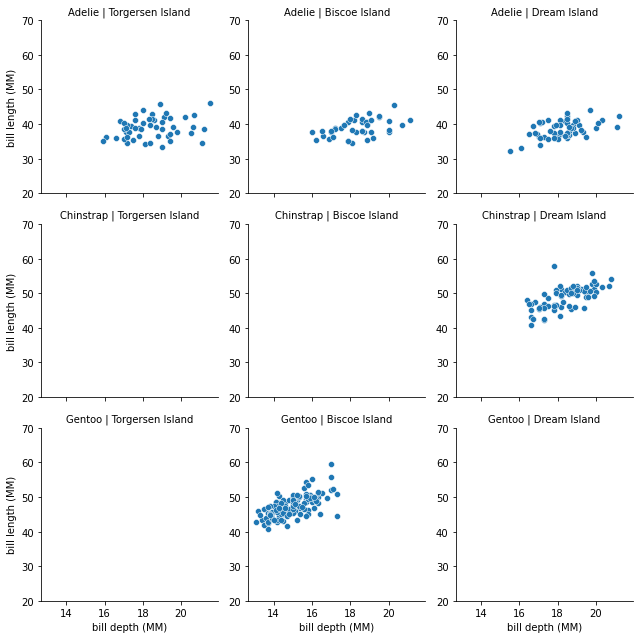

In [12]:
g = sns.FacetGrid(penguins, col='island', row='species', sharey=False, ylim=(20,70))
g.map_dataframe(sns.scatterplot, 'bill_depth_mm', 'bill_length_mm')
g.set_axis_labels('bill depth (MM)', 'bill length (MM)') #  setting names to x and y axies
g.set_titles(col_template='{col_name} Island' , row_template='{row_name}') #  setting title of each plot using {col_name}

## using hue

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

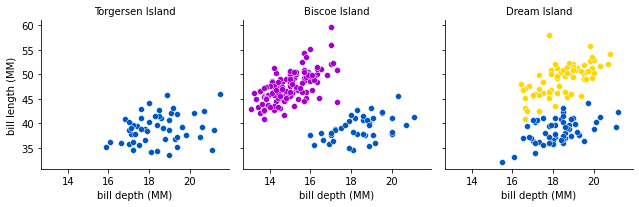

In [13]:
g = sns.FacetGrid(penguins, col='island',  hue='species', palette='prism') #  setting species column as hue
g.map_dataframe(sns.scatterplot, 'bill_depth_mm', 'bill_length_mm')
g.set_axis_labels('bill depth (MM)', 'bill length (MM)') #  setting names to x and y axies
g.set_titles(col_template='{col_name} Island' , row_template='{row_name}') #  setting title of each plot using {col_name}

## KDE plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

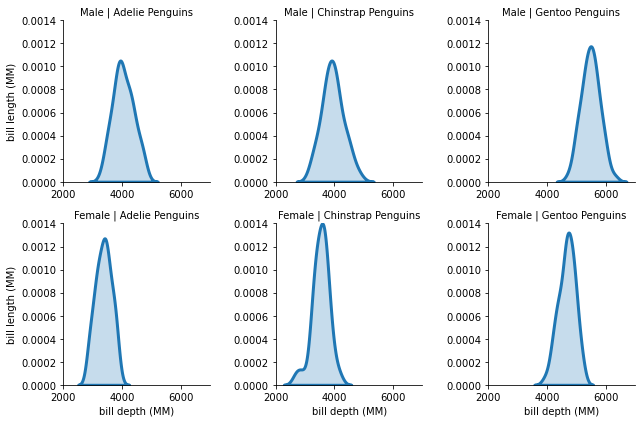

In [14]:
quantity = 'body_mass_g'
g = sns.FacetGrid(penguins, row='sex', col='species', sharey=False, sharex=False, ylim=(0, .0014),
                 xlim=(2000,7000))
g.map(sns.kdeplot, quantity, lw=3, shade=True)# using kdeplot (kernel denstity estimation) plot
g.set_axis_labels('bill depth (MM)', 'bill length (MM)')
g.set_titles(row_template='{row_name}', col_template='{col_name} Penguins');

## custom functions

In [15]:
def add_mean_line(data, var=None, **kwargs):
    
    #  If no variable provided skim adding mean line
    if not var: return
    
    #  Calculating mean value for each group
    mean = np.mean(data[var])
    
    #  Get current axis
    ax = plt.gca()
    
    #  Adding line at group mean
    
    ax.axvline(mean, color='red', lw=3, ls='--') # lw - line width, ls - line style
    
    #  Annotate group mean
    x_pos = 0.65
    fontsize = 12
    if mean > 5000: 
        x_pos = .03
        fontsize = 11
    
    ax.text(x_pos, 0.7, f'mean={mean: .0f}',
            transform = ax.transAxes, #  transforms positions to range (0,0) from (1,1)
            color = 'red', fontweight='bold', fontsize=fontsize)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

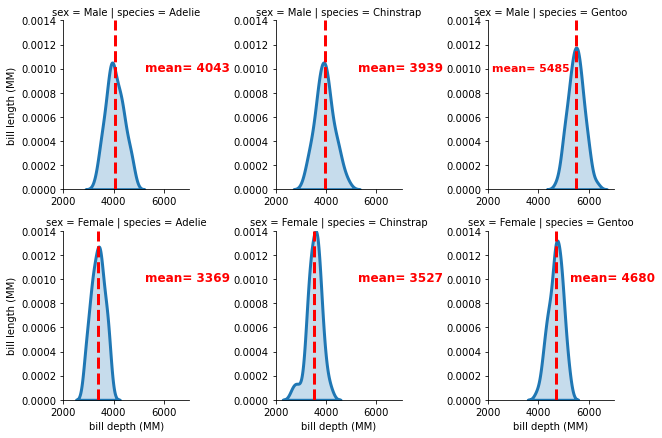

In [16]:
g.map_dataframe(add_mean_line, var=quantity)
g.set_axis_labels('bill depth (MM)', 'bill length (MM)')